## 作业1. 复现课堂代码

In [49]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [44]:
import random

In [5]:
random.choice('蓝色的 | 好看的 | 小小的'.split('|'))

'蓝色的 '

In [8]:
random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

'好看的'

In [9]:
def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [10]:
adj()

'小小的'

In [11]:
def adj_star():
    return random.choice([lambda: "", lambda: adj() + adj_star()])()

In [13]:
adj_star()

'好看的蓝色的好看的'

## 将上述方法更换为*数据驱动*的方法

In [14]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [15]:
grammar = {}
for line in adj_grammar.split("\n"):
    if not line.strip(): continue
    x, y = line.split("=>")
    grammar[x.strip()] = [s.split() for s in y.split("|")]
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [45]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split("\n"):
        if not line.strip(): continue
        x, y = line.split(split)
        grammar[x.strip()] = [s.split() for s in y.split("|")]
    return grammar

In [17]:
print (create_grammar(adj_grammar))

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}


In [50]:
example_grammar = create_grammar(simple_grammar)

In [51]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [52]:
from random import choice as ch

In [53]:
def generate(gram, target):
    if target not in gram: return target
    expand = [generate(gram, t) for t in ch(gram[target])]
    return "".join([i for i in expand if i != "null"])

In [29]:
generate(example_grammar, "sentence")

'一个好看的蓝色的小小的好看的篮球看见一个桌子'

In [30]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [31]:
create_grammar(human, split='=', line_split='\n')

{'human': [['自己', '寻找', '活动']],
 '自己': [['我'], ['俺'], ['我们']],
 '寻找': [['找找'], ['想找点']],
 '活动': [['乐子'], ['玩的']]}

In [34]:
generate(create_grammar(human, split='=', line_split='\n'), "human")

'我们想找点乐子'

In [37]:
for i in range(20):
    print (generate(create_grammar(host, split='=', line_split='\n'), "host"))

先生,您好我是2号,请问你要赌博吗？
您好我是5745号,请问你要赌博吗？
你好我是87号,您需要喝酒吗？
小朋友,您好我是9号,您需要喝酒吗？
先生,你好我是62367号,请问你要喝酒吗？
你好我是6号,您需要喝酒吗？
女士,您好我是479号,您需要打猎吗？
您好我是76号,请问你要喝酒吗？
女士,您好我是5号,您需要赌博吗？
您好我是99号,您需要打牌吗？
你好我是1号,请问你要打牌吗？
你好我是7号,请问你要打猎吗？
您好我是6号,您需要打牌吗？
先生,您好我是72号,您需要赌博吗？
您好我是287号,您需要打猎吗？
先生,您好我是575号,请问你要赌博吗？
先生,你好我是4156号,您需要打牌吗？
先生,您好我是9号,您需要打牌吗？
您好我是658号,请问你要喝酒吗？
小朋友,你好我是7号,您需要打牌吗？


## 如何判断生成的句子是否合理——*语言模型*

In [38]:
import os

In [40]:
os.getcwd()

'C:\\Users\\YJY'

In [42]:
!pip install jieba

Looking in indexes: http://pypi.douban.com/simple
  Running setup.py bdist_wheel for jieba: started
  Running setup.py bdist_wheel for jieba: finished with status 'done'
  Stored in directory: C:\Users\YJY\AppData\Local\pip\Cache\wheels\f9\f6\9d\02ac6ba74c56da67e49dfe05166b4bc88f3d8f938d772d9dd0
Successfully built jieba


In [2]:
import jieba

In [14]:
filename = 'E:/NLP/sqlResult_1558435.csv'

In [15]:
import pandas as pd

In [16]:
content = pd.read_csv(filename, encoding='gb18030')

In [47]:
content.head(2)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm


In [48]:
content["content"][0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [54]:
type(content["content"])

pandas.core.series.Series

In [17]:
import re

In [18]:
def token(string):
    return re.findall('\w+', string)

In [19]:
articles = content['content'].tolist()

In [52]:
len(articles)

89611

In [53]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [10]:
from collections import Counter

In [58]:
with_jieba_cut = Counter(jieba.cut(articles[0]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\YJY\AppData\Local\Temp\jieba.cache
Loading model cost 1.537 seconds.
Prefix dict has been built succesfully.


In [74]:
jieba.cut("我们还是等待官方消息")

<generator object Tokenizer.cut at 0x000000001CDED390>

In [75]:
list(jieba.cut("我们还是等待官方消息"))

['我们', '还是', '等待', '官方消息']

In [59]:
with_jieba_cut.most_common()[:10]

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2)]

In [60]:
with_jieba_cut.most_common(10)

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2)]

In [61]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [62]:
''.join(token(articles[0]))

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [20]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [21]:
len(articles_clean)

89611

In [22]:
with open('E:/NLP/article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [23]:
def cut(string): return list(jieba.cut(string))

In [24]:
TOKEN = []

In [25]:
for i, line in enumerate((open('E:/NLP/article_9k.txt'))):
    if i % 4000 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
#     if i > 10000: break    
#     print (line.split("\n")[0])
    TOKEN += cut(line.split("\n")[0])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YJY\AppData\Local\Temp\jieba.cache


0


Loading model cost 1.169 seconds.
Prefix dict has been built succesfully.


4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
52000
56000
60000
64000
68000
72000
76000
80000
84000
88000


In [11]:
words_count = Counter(TOKEN)

In [12]:
words_count.most_common(50)

[]

In [87]:
frequiences = [f for w, f in words_count.most_common(100)]

In [88]:
x = [i for i in range(100)]

In [89]:
len(x)

100

In [90]:
%matplotlib inline

In [91]:
import matplotlib.pyplot as plt

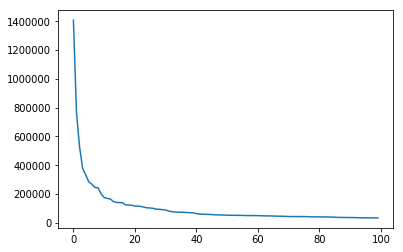

In [94]:
plt.plot(x, frequiences)

In [95]:
import numpy as np

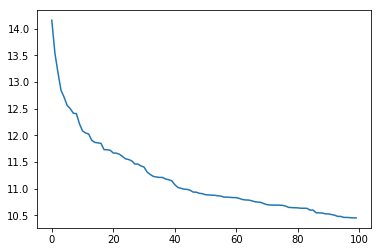

In [96]:
plt.plot(x, np.log(frequiences))

In [97]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [98]:
prob_1('我们')

0.0011370562812415559

In [99]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [103]:
len(TOKEN[:-2])

35146895

In [104]:
len(TOKEN)

35146897

In [26]:
TOKEN = [str(t) for t in TOKEN]

In [27]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [28]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [29]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [30]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [31]:
prob_2('我们', '在')

3.069262471631429e-05

In [32]:
prob_2('在', '吃饭')

2.852474416014339e-07

In [33]:
prob_2('去', '吃饭')

7.98692836484015e-07

In [34]:
prob_2('好', '难受')

5.704948832028678e-08

In [35]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [41]:
get_probablity('小明今天抽奖抽到一台苹果手机')

1.551397313841617e-42

In [40]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.1583766610017408e-41

In [43]:
get_probablity('洋葱奶昔来一杯')

1.8567578157408427e-22

In [42]:
get_probablity('养乐多绿来一杯')

3.254644117606538e-15

In [54]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个好看的篮球听着这个小猫 with Prb: 4.370942800554622e-45
sentence: 这个好看的小小的小猫听着这个女人 with Prb: 1.0841741315168805e-53
sentence: 这个女人听着这个好看的蓝色的小猫 with Prb: 8.01596469712556e-56
sentence: 一个女人听着这个小小的小小的女人 with Prb: 3.2069417286677934e-46
sentence: 这个好看的蓝色的女人听着一个小猫 with Prb: 2.0271433450448682e-55
sentence: 这个小小的好看的蓝色的篮球听着这个好看的小小的桌子 with Prb: 1.3182397979966386e-82
sentence: 这个小小的小小的小猫看见一个小猫 with Prb: 1.241117851073294e-42
sentence: 这个蓝色的桌子看着一个小小的蓝色的小小的蓝色的桌子 with Prb: 1.3074157965108564e-78
sentence: 一个小小的好看的蓝色的篮球看着这个桌子 with Prb: 7.556032296470816e-57
sentence: 这个桌子坐在这个篮球 with Prb: 1.059270833227084e-29


In [55]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.9877960696419972e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5902368557135977e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.6410899733664495e-34
---- 真是一只好看的小猫 with probility 8.135199999184005e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.4535695372779675e-20
---- 今晚火锅去吃我 with probility 5.508208332780837e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.8567578157408427e-22
---- 养乐多绿来一杯 with probility 3.254644117606538e-15
